## Autocorrelation function vs power spectrum

Following the autocorrelation theorem presented in Fig.1 of Crovisier & Dickey 1983
http://adsabs.harvard.edu/abs/1983A%26A...122..282C

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from noisegen import fbm2d
from powspec import powspec
from scipy.signal import correlate2d
from astropy.io import fits

Creation of an exponentiated fractional Brownian motion map with a power law of 3.6

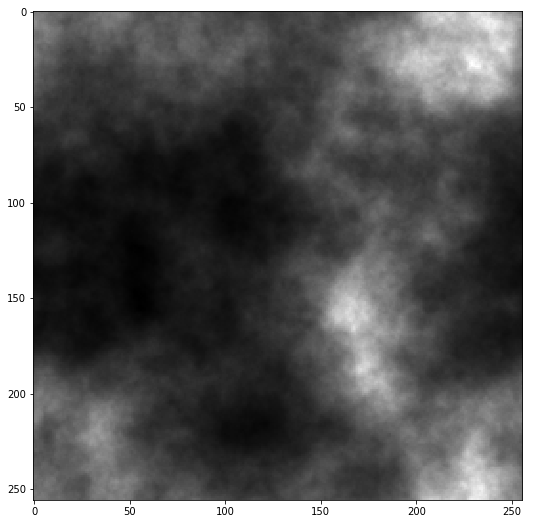

In [36]:
N = 256
#efbm = fbm2d(-3.6,N,N)
HDU=fits.open("/Users/robitaij/Desktop/efbm.fits")
efbm = HDU[0].data

figure(figsize(9,9))
imshow(efbm,cmap='gray')

Plot its power spectrum

0.5785305356414499


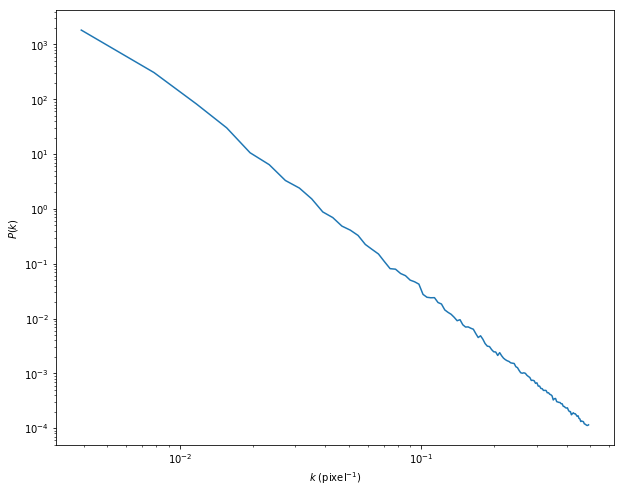

In [37]:
tab_k,spec_k = powspec(efbm, reso=1.0)

figure(figsize=(10,8))
plot(tab_k, spec_k)
xlabel(r'$k$ (pixel$^{-1}$)')
ylabel(r'$P(k)$')
xscale('log')
yscale('log')

print(np.std(efbm))

Inverse Fourier transform of the power spectrum, which should correspond to the autocorrelation function

## Interprétation de la matrice d'autocorrelation

En supposant que l'équation de l'autocorrelation 2D de scipy correspond bien a

$$R(j,k)=\sum_{n,q} \frac{x_{n,q}x_{n-j,q-k}}{\sigma_x^2},$$

alors un spectre d'autocorrélation 1D pourrait être estimé en faisant une moyenne radiale des distances $r=\sqrt{j^2+k^2}$.

## Excess probability compared to Poisson noise

According to Peacock & Nicholson 1991 (http://adsabs.harvard.edu/abs/1991MNRAS.253..307P) the two-point correlation function in cosmology is defined as

$$1+\xi(r) = \langle DD \rangle / \langle DR \rangle,$$

where $\langle DD \rangle$ is the autocorrelation function of the data and $\langle DR \rangle$ is the cross-correlation between the data and a random catalogue of galaxies.

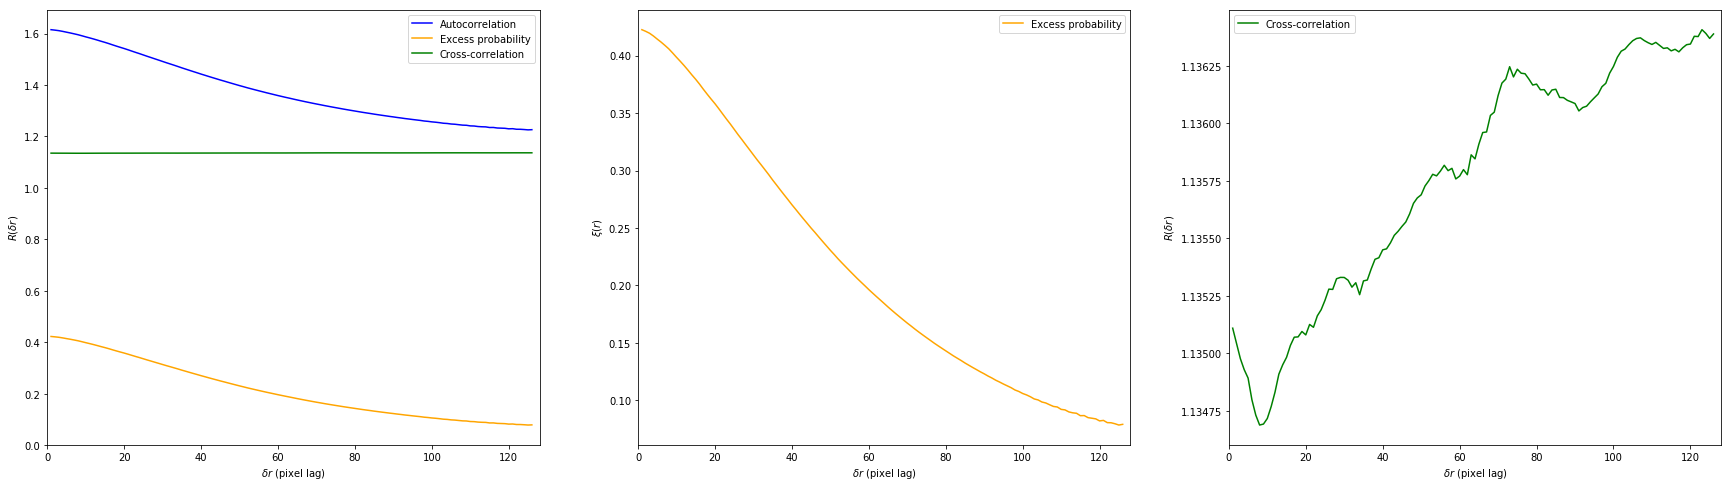

In [63]:
#Autocorralation of the efBm
lag,DD = powspec(efbm, reso=1.0, autocorr= True)

#Create the random fractal distribution (fbm)
poisson = np.random.poisson(size=(256,256))

#Calculate the two-point correlation between the efBm and the fBm.
lag,DR = powspec(efbm, im2=poisson, reso=1.0, autocorr= True)

#Excess probability
eP = DD/DR -1

figure(figsize=(30,8))
subplot(1,3,1)
plot(lag,DD,label='Autocorrelation',color='blue')
plot(lag,eP,label='Excess probability',color='orange')
plot(lag,DR,label='Cross-correlation',color='green')
xlabel(r'$\delta r$ (pixel lag)')
ylabel(r'$R(\delta r)$')
xlim((0,N/2.))
plt.legend()

subplot(1,3,2)
plot(lag,eP,label='Excess probability',color='orange')
xlabel(r'$\delta r$ (pixel lag)')
ylabel(r'$\xi(r)$')
xlim((0,N/2.))
plt.legend()

subplot(1,3,3)
plot(lag,DR,label='Cross-correlation',color='green')
xlabel(r'$\delta r$ (pixel lag)')
ylabel(r'$R(\delta r)$')
xlim((0,N/2.))
plt.legend()